<a href="https://colab.research.google.com/github/DebjitHore/PadhAI_FDS/blob/master/PadhAI_Week12_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import json
import urllib.request
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

#Plotting the composition of Data

##Static Composition

###Pie Chart

In [2]:
p= sns.load_dataset('penguins')
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
p.groupby('species').count()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,152,151,151,151,151,146
Chinstrap,68,68,68,68,68,68
Gentoo,124,123,123,123,123,119


In [4]:
count= p.groupby('species')['species'].count()

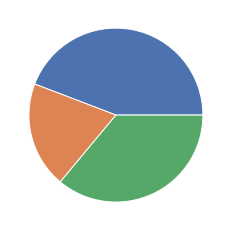

In [5]:
plt.pie(count);

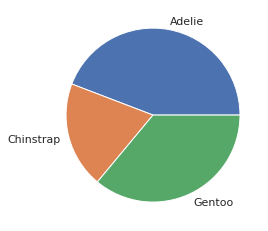

In [6]:
plt.pie(count, labels=count.index);

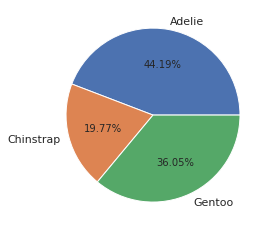

In [7]:
plt.pie(count, labels=count.index, autopct='%.2f%%'); #Adding percentage values for each species

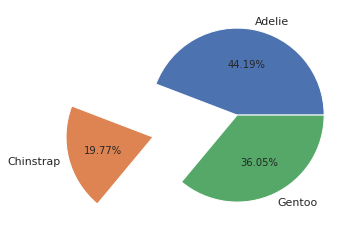

In [8]:
plt.pie(count, labels=count.index, autopct='%.2f%%', explode=[0,1,0]);#Separating out only one particular pie

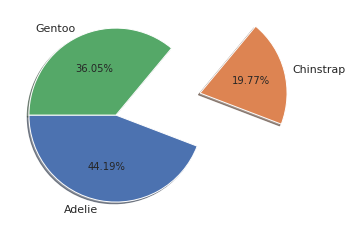

In [9]:
plt.pie(count, labels=count.index, autopct='%.2f%%', explode=[0,1,0], startangle=180, shadow=True);#Separating out only one particular pie

###Donut Plot

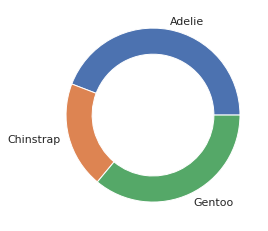

In [10]:
plt.pie(count, wedgeprops=dict(width=0.3), labels=count.index);

In [11]:
cmap= plt.get_cmap('Dark2')
my_colors= cmap([0,1,2])

In [12]:
counts_island= p.groupby('island')['island'].count()
counts_island

island
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

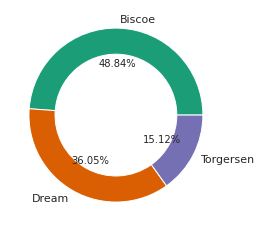

In [13]:
plt.pie(counts_island, wedgeprops=dict(width=0.3), autopct='%.2f%%', labels=counts_island.index, colors=my_colors);

In [14]:
c=pd.crosstab(p.species, p.island).T
c

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


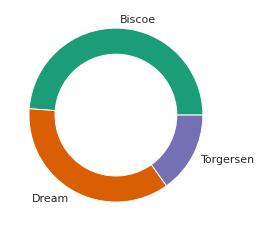

In [15]:
plt.pie(c.sum(axis=1), wedgeprops=dict(width=0.3),  labels=c.index, colors=my_colors);

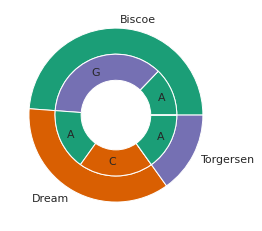

In [16]:
plt.pie(c.sum(axis=1), wedgeprops=dict(width=0.3), radius=1,  labels=c.index, colors=my_colors);
plt.pie(c.values.flatten(), wedgeprops=dict(width=0.3), labels=['A', '', 'G', 'A', 'C', '', 'A', '',''], radius=0.7, colors=my_colors, labeldistance=0.75);

###Stacked Bar Plot

In [17]:
url='https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

with open ('data.json') as f:
  data=json.load(f)
data=data['states_daily']
df= pd.json_normalize(data)

In [18]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [19]:
df_=df.tail(3)
df_.drop('date', axis=1, inplace=True)
df_.drop('dateymd', axis=1, inplace=True)

df_.set_index('status', inplace=True)
df_=df_.T
df_=df_.apply(pd.to_numeric)
df_.drop('tt', inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df_.head()

status,Confirmed,Recovered,Deceased
an,1,3,0
ap,2068,2127,22
ar,379,488,1
as,1179,1441,20
br,72,94,1


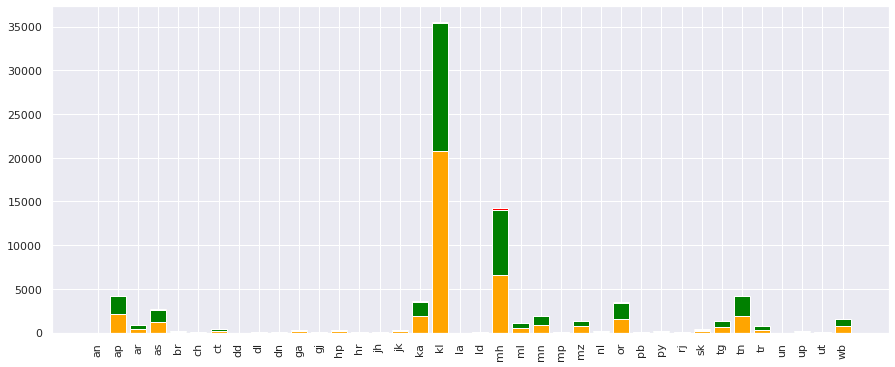

In [21]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.Confirmed, color='Orange')
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green')
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color='Red')

plt.xticks(rotation=90);

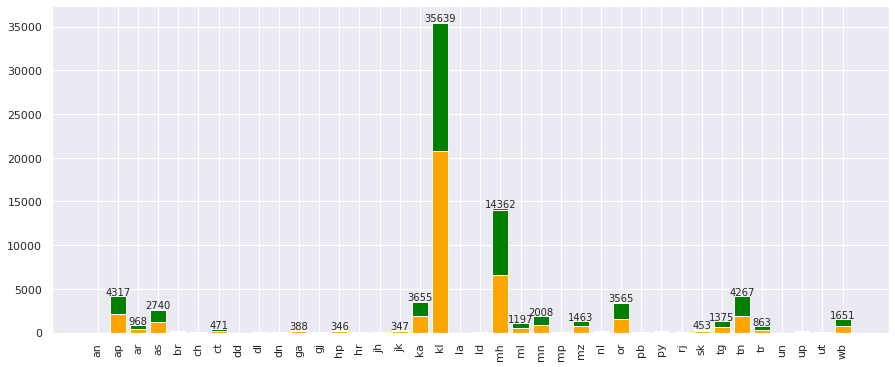

In [22]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.Confirmed, color='Orange')
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green')
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color='Red')

plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
  x=i
  y= df_.loc[val].sum()+100
  if y>300:
    plt.text(x,y, str(y), ha='center');

In [23]:
df_.head()

status,Confirmed,Recovered,Deceased
an,1,3,0
ap,2068,2127,22
ar,379,488,1
as,1179,1441,20
br,72,94,1


###Relative Stacked Bar Plot

In [24]:

df_['Total']= df_.sum(axis=1)
df_.head()

status,Confirmed,Recovered,Deceased,Total
an,1,3,0,4
ap,2068,2127,22,4217
ar,379,488,1,868
as,1179,1441,20,2640
br,72,94,1,167


In [25]:
df_['FractionConfirmed']= df_.Confirmed/df_.Total
df_['FractionRecovered']= df_.Recovered/df_.Total
df_['FractionDeceased']= df_.Deceased/df_.Total


In [26]:
df_.head()

status,Confirmed,Recovered,Deceased,Total,FractionConfirmed,FractionRecovered,FractionDeceased
an,1,3,0,4,0.250000,0.750000,0.000000
ap,2068,2127,22,4217,0.490396,0.504387,0.005217
ar,379,488,1,868,0.436636,0.562212,0.001152
as,1179,1441,20,2640,0.446591,0.545833,0.007576
br,72,94,1,167,0.431138,0.562874,0.005988


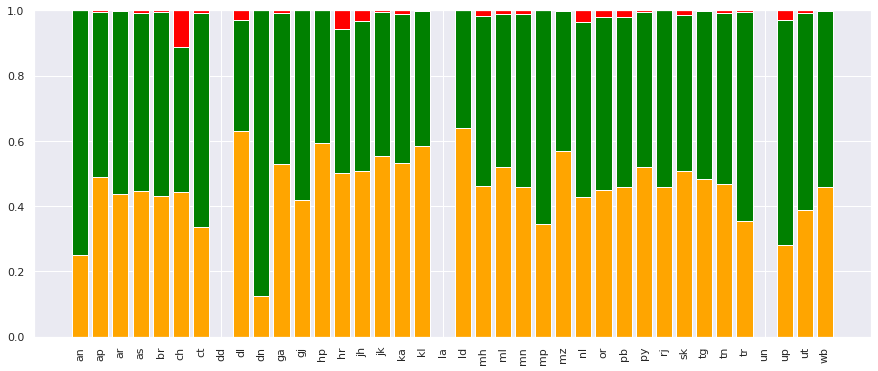

In [27]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.FractionConfirmed, color='Orange')
plt.bar(df_.index, df_.FractionRecovered, bottom=df_.FractionConfirmed, color='Green')
plt.bar(df_.index, df_.FractionDeceased, bottom=df_.FractionConfirmed+df_.FractionRecovered, color='Red')

plt.xticks(rotation=90);

In [28]:
df_=df_.sort_values('FractionConfirmed', ascending=False)

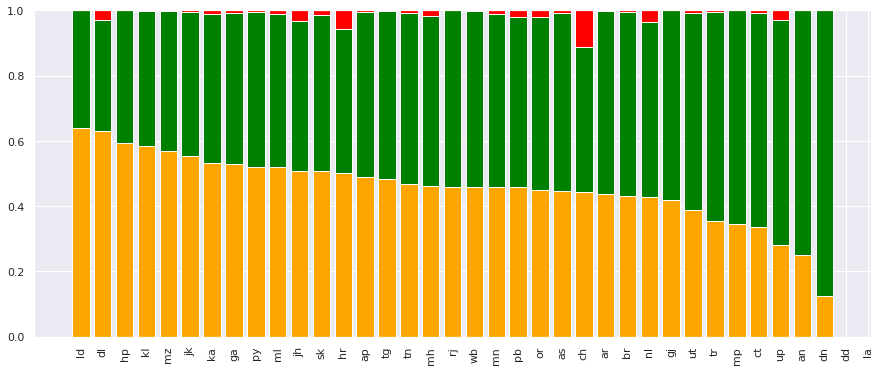

In [29]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.FractionConfirmed, color='Orange')
plt.bar(df_.index, df_.FractionRecovered, bottom=df_.FractionConfirmed, color='Green')
plt.bar(df_.index, df_.FractionDeceased, bottom=df_.FractionConfirmed+df_.FractionRecovered, color='Red')

plt.xticks(rotation=90);

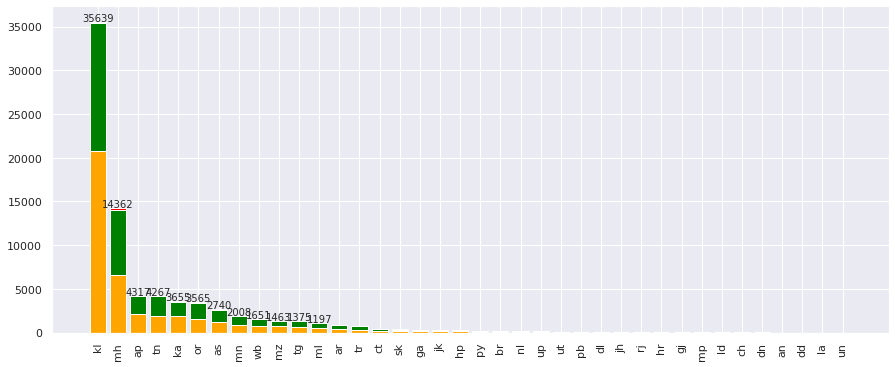

In [30]:
df_=df_.sort_values('Total', ascending=False)
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.bar(df_.index, df_.Confirmed, color='Orange')
plt.bar(df_.index, df_.Recovered, bottom=df_.Confirmed, color='Green')
plt.bar(df_.index, df_.Deceased, bottom=df_.Confirmed+df_.Recovered, color='Red')

plt.xticks(rotation=90);

for i, val in enumerate(df_.index):
  x=i
  y= df_.loc[val,'Total']+100
  if y>1000:
    plt.text(x,y, str(y), ha='center');

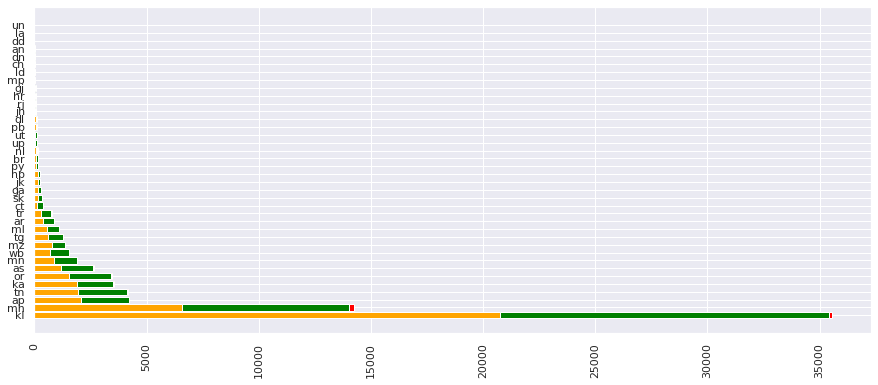

In [31]:
df_=df_.sort_values('Total', ascending=False)
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.barh(df_.index, df_.Confirmed, color='Orange')
plt.barh(df_.index, df_.Recovered, left=df_.Confirmed, color='Green')
plt.barh(df_.index, df_.Deceased, left=df_.Confirmed+df_.Recovered, color='Red')

plt.xticks(rotation=90);



###Time Varying composition of data.

#### Stacked Area Plots

In [32]:
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [33]:
df_= df[['mh', 'date', 'status' ]]


In [34]:
df_['mh']=pd.to_numeric(df_['mh']);
df_['date']=pd.to_datetime(df_['date']);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_=df_.pivot_table(values='mh', columns='status', index='date')
df_.head()

status,Confirmed,Deceased,Recovered
date,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


In [36]:
df_[df_.Confirmed<0]= 0

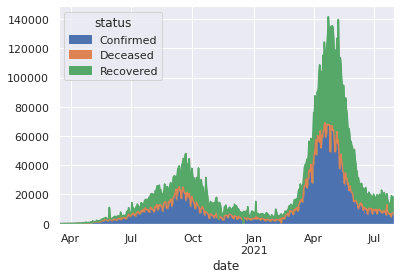

In [37]:
df_.plot.area(stacked=True)

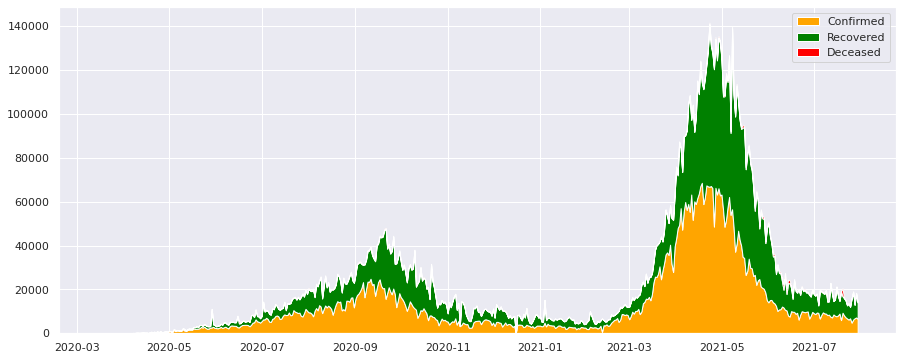

In [38]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed, df_.Recovered, df_.Deceased,
              colors= ['orange', 'green', 'red'],
              labels= ['Confirmed', 'Recovered', 'Deceased']);
plt.legend();


### Relative stacked area plot

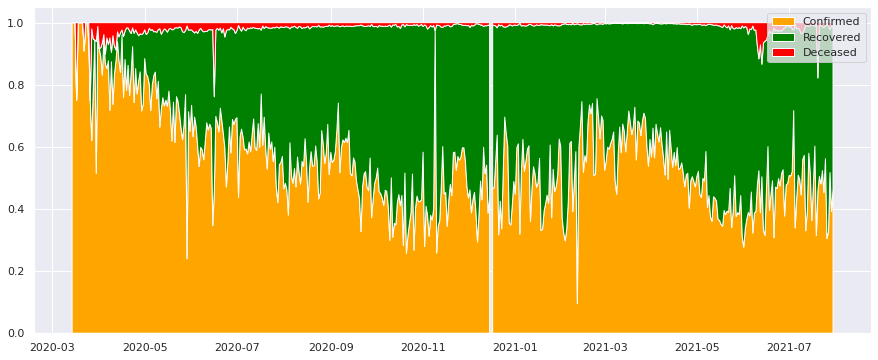

In [39]:
fig= plt.gcf();
fig.set_size_inches(15,6);
plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), df_.Recovered/df_.sum(axis=1), df_.Deceased/df_.sum(axis=1),
              colors= ['orange', 'green', 'red'],
              labels= ['Confirmed', 'Recovered', 'Deceased']);
plt.legend();


In [40]:
def plot_stacked_area_by_state(state):
  df_=df[[state, 'date', 'status']];
  df_[state]=pd.to_numeric(df_[state]);
  df_['date']=pd.to_datetime(df_['date']);
  df_=df_.pivot_table(values=state, columns='status', index='date')
  fig= plt.gcf();
  fig.set_size_inches(15,6);
  plt.stackplot(df_.index, df_.Confirmed/df_.sum(axis=1), df_.Recovered/df_.sum(axis=1), df_.Deceased/df_.sum(axis=1),
                colors= ['orange', 'green', 'red'],
                labels= ['Confirmed', 'Recovered', 'Deceased']);
  plt.legend();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


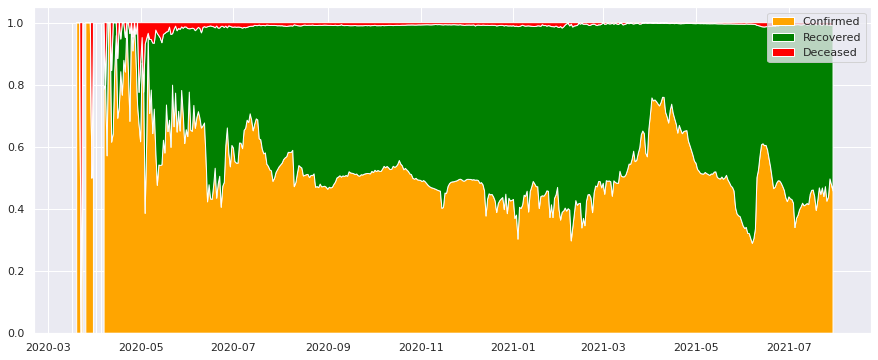

In [41]:
plot_stacked_area_by_state('wb')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


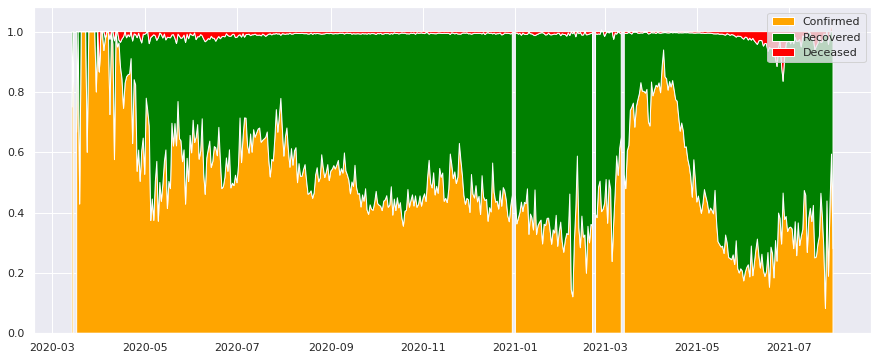

In [42]:
plot_stacked_area_by_state('up')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


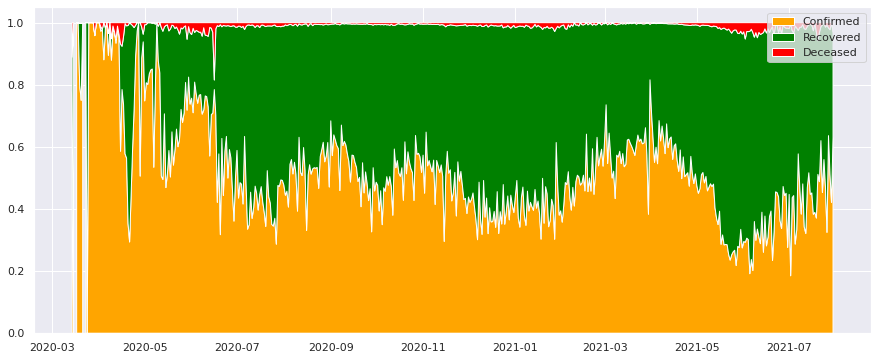

In [43]:
plot_stacked_area_by_state('dl')

### Scatter Plots

In [44]:
t= sns.load_dataset('tips')
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


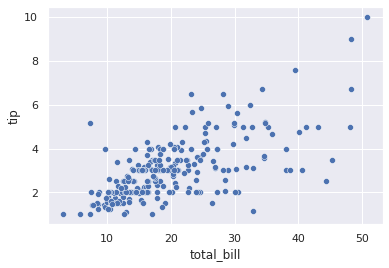

In [45]:
sns.scatterplot(x='total_bill', y='tip', data=t); #Trying to draw co-relation b/w bill amount and tip paid

In [46]:
t['tip_fraction']=t.tip/t.total_bill
t.head()

,total_bill,tip,sex,smoker,day,time,size,tip_fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


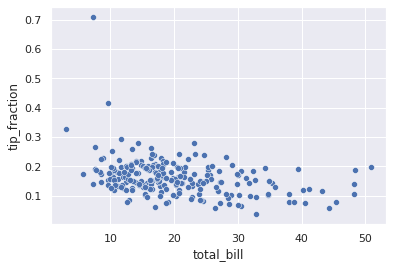

In [47]:
sns.scatterplot(x='total_bill', y='tip_fraction', data=t )

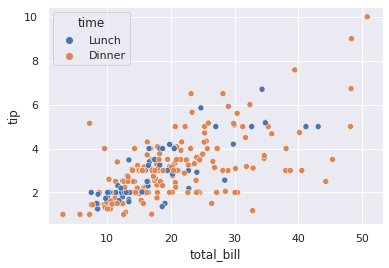

In [48]:
sns.scatterplot(x='total_bill', y='tip', hue='time',data=t);

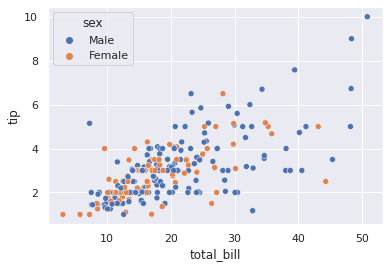

In [49]:
sns.scatterplot(x='total_bill', y='tip', hue='sex',data=t);

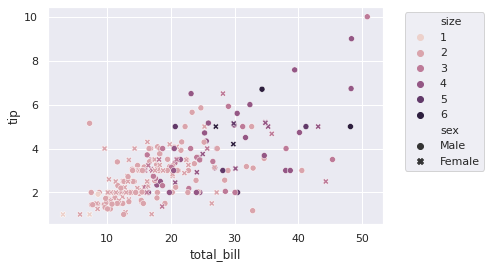

In [50]:
sns.scatterplot(x='total_bill', y='tip', hue='size', style= 'sex' ,data=t);
plt.legend(bbox_to_anchor=(1.05, 1)) #To shift the legend outside the figure

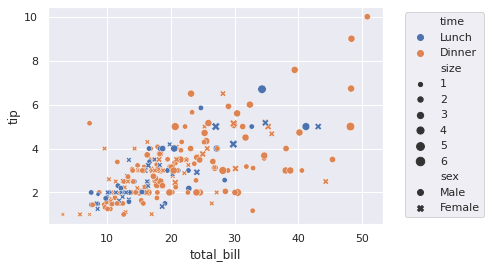

In [51]:
sns.scatterplot(x='total_bill', y='tip', hue='time', style= 'sex', size='size',data=t);
plt.legend(bbox_to_anchor=(1.05, 1)) #To shift the legend outside the figure

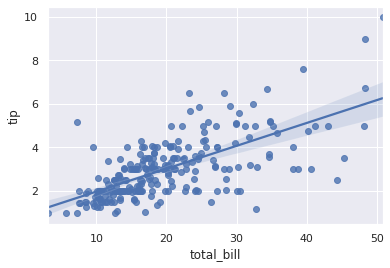

In [52]:
sns.regplot(x='total_bill', y='tip',data=t);

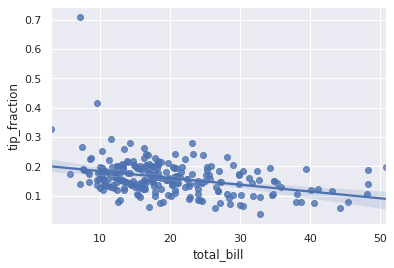

In [53]:
sns.regplot(x='total_bill', y='tip_fraction',data=t);

In [54]:
d=sns.load_dataset('diamonds')
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


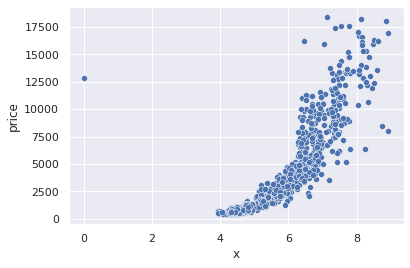

In [55]:
sns.scatterplot(x='x', y='price', data=d.sample(1000))

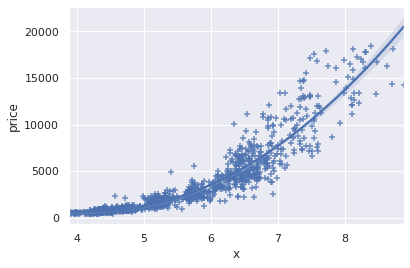

In [56]:
sns.regplot(x='x', y='price', data=d.sample(1000), order=2, marker='+')

### Bar Plot

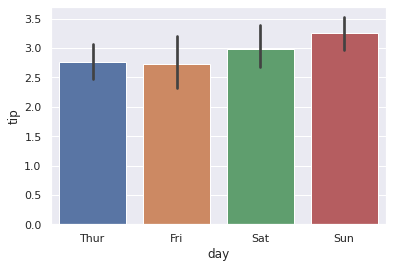

In [57]:
sns.barplot(x='day', y='tip', data=t) #Mean value for that particular categorical variable

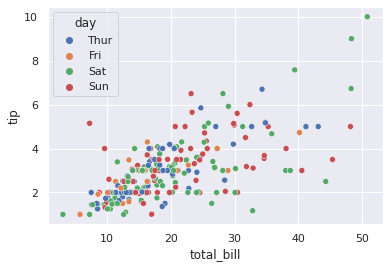

In [58]:
sns.scatterplot(x='total_bill', y='tip', hue='day', data=t)

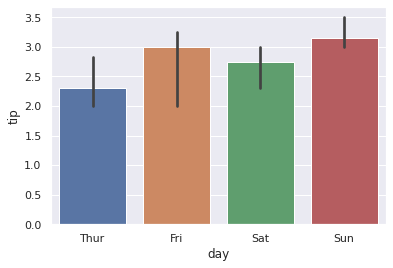

In [59]:
sns.barplot(x='day', y='tip', data=t, estimator= np.median) #Median value for that particular categorical variable is plotted

In [60]:
def my_estimate(v):
  return np.quantile(v, 0.25)


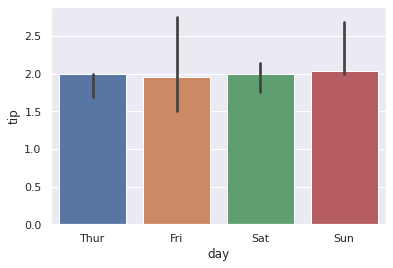

In [61]:
sns.barplot(x='day', y='tip', data=t, estimator= my_estimate);

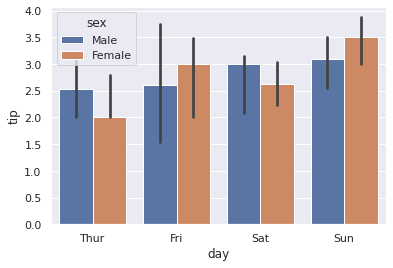

In [62]:
sns.barplot(x='day', y='tip', data=t, hue='sex', estimator= np.median);

In [63]:
d['x_q']=pd.cut(d.x, bins=15, labels=False)
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,x_q
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,6


In [64]:
d.x_q.unique()

array([ 5,  6,  7,  9,  8, 10,  0, 11, 12, 13, 14])

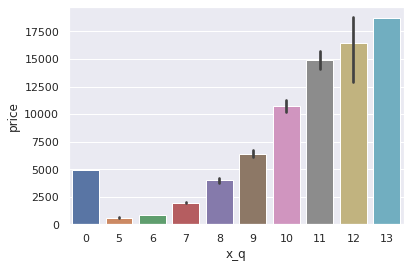

In [65]:
sns.barplot(x='x_q', y='price', data=d.sample(1000)) #Breaking the numerical data into bins and plotting a cumulative count

### Line Plot

In [66]:
f= sns.load_dataset('fmri')
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [67]:
f.subject.unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [68]:
f.groupby('subject', axis=1)
f.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


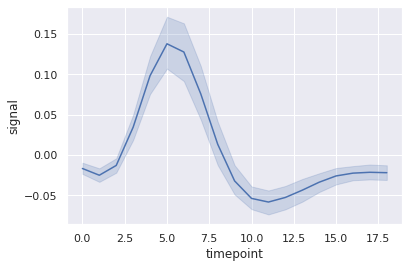

In [69]:
sns.lineplot('timepoint', 'signal', data=f)

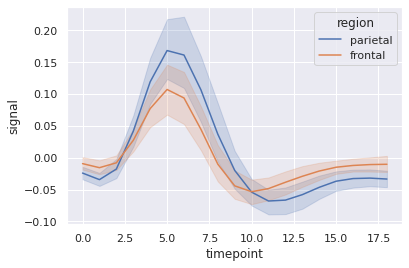

In [70]:
sns.lineplot(x='timepoint',y= 'signal', data=f, hue='region');

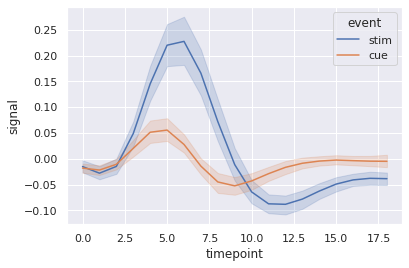

In [71]:
sns.lineplot(x='timepoint',y= 'signal', data=f, hue='event');

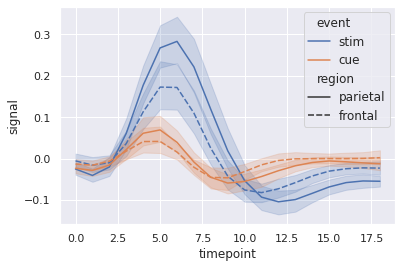

In [72]:
sns.lineplot(x='timepoint',y= 'signal', data=f, hue='event', style='region');

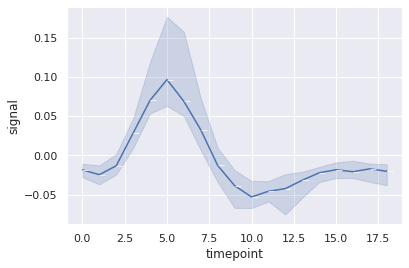

In [73]:
sns.lineplot(x='timepoint',y= 'signal', data=f,marker=True, estimator=np.median);

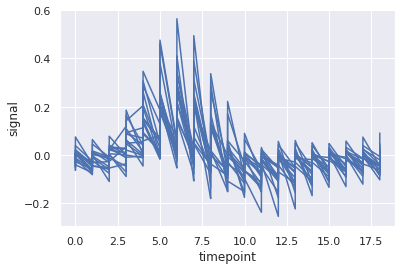

In [74]:
sns.lineplot(x='timepoint',y= 'signal', data=f,units='subject', estimator=None);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


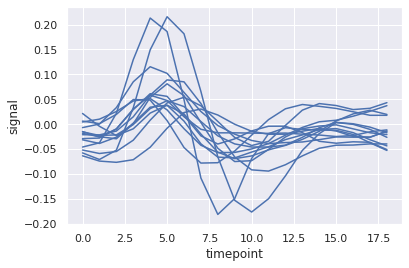

In [75]:
f_= f[(f.region=='parietal') & (f.event =='cue')]
sns.lineplot('timepoint', 'signal', data=f_, units='subject', estimator=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


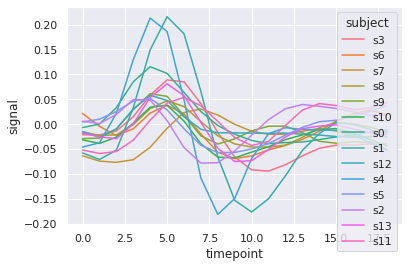

In [76]:
sns.lineplot('timepoint', 'signal', data=f_, hue='subject', estimator=None)

### Line Plot- Covid Data

In [122]:
url='https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

with open ('data.json') as f:
  data=json.load(f)
data=data['states_daily']
df= pd.json_normalize(data)

In [123]:
df.drop('tt', axis=1, inplace=True)
df.drop('dateymd', axis=1, inplace=True)

df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df= df[df['status']=='Confirmed']
df.drop('status', axis=1, inplace=True)
df=df.apply(pd.to_numeric)
df= df.rolling(7).mean()
df.reset_index(inplace=True)


In [124]:
df_=pd.melt(df, id_vars='date', 
           value_vars=list(df.columns).remove('date'),
           var_name='state', value_name='confirmed')

In [125]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,NaN
1,2020-03-15,an,NaN
2,2020-03-16,an,NaN
3,2020-03-17,an,NaN
4,2020-03-18,an,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


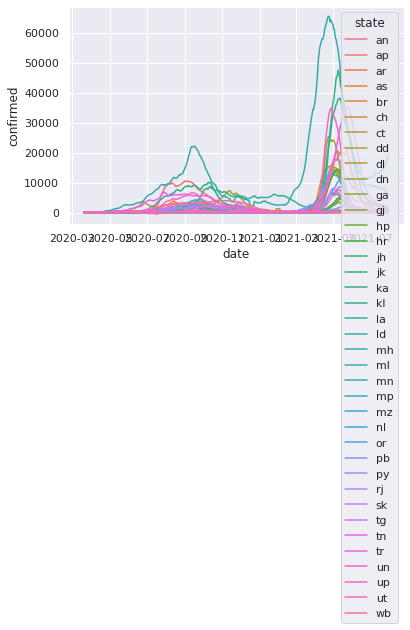

In [126]:
sns.lineplot('date', 'confirmed', data=df_, hue='state');

In [127]:
states= ['mh', 'dl', 'gj', 'ka', 'wb', 'tn']
df_states= df_[df_.state.isin(states)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


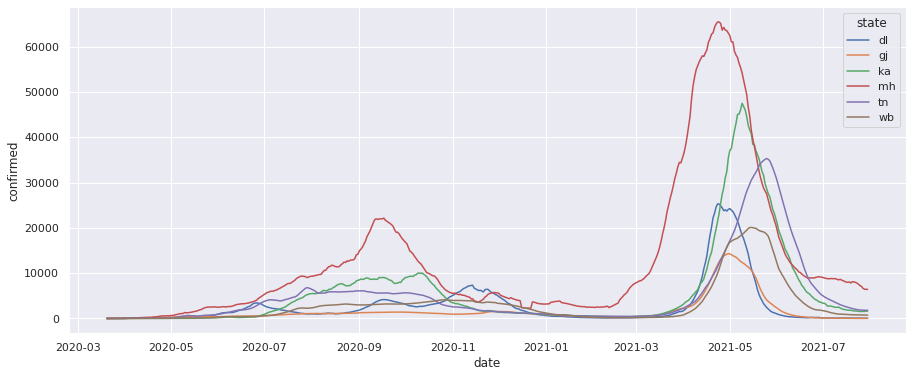

In [128]:
sns.lineplot('date', 'confirmed', data=df_states, hue='state');
fig= plt.gcf()
fig.set_size_inches(15,6)

### Heat Map

Discrete variables on both axes.

In [129]:
x=np.random.rand(10,10)

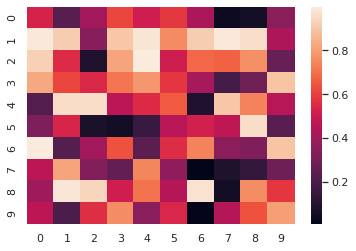

In [130]:
sns.heatmap(x)

In [133]:
fl= sns.load_dataset('flights')

In [134]:
fl.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [141]:
fl_pivot= fl.pivot_table(values='passengers', index='year', columns='month')
fl_pivot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


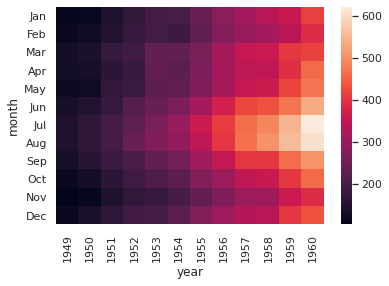

In [143]:
sns.heatmap(fl_pivot.T)

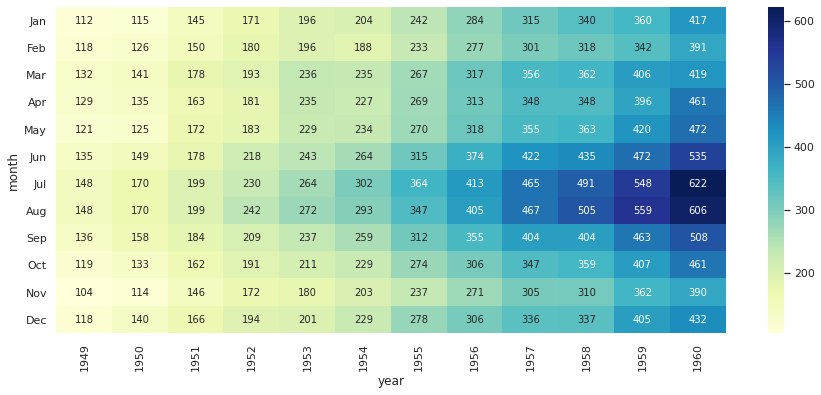

In [147]:
sns.heatmap(fl_pivot.T, annot=True, fmt='d', cmap='YlGnBu')
fig=plt.gcf()
fig.set_size_inches(15,6)